In [197]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import Sequential
import tensorflow.keras.layers as tfl
from tensorflow.keras.utils import image_dataset_from_directory
import tqdm
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()
import tensorflow as tf
import seaborn as sn
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential


In [198]:
BATCH_SIZE = 64
IMAGE_SIZE = (224, 224)
train_dir = r"C:\Users\Ayain John\OneDrive\Desktop\DL DATASET\Train/" 
test_dir = r"C:\Users\Ayain John\OneDrive\Desktop\DL DATASET\Test/" 

train_dataset = image_dataset_from_directory(train_dir,shuffle=True, batch_size=BATCH_SIZE,image_size=IMAGE_SIZE,validation_split=0.2,subset='training', seed = 42)
validation_dataset = image_dataset_from_directory(test_dir,shuffle=True, batch_size=BATCH_SIZE,image_size=IMAGE_SIZE,validation_split=0.2,subset='validation', seed = 42)

Found 73 files belonging to 5 classes.
Using 59 files for training.
Found 46 files belonging to 5 classes.
Using 9 files for validation.


In [199]:
IMAGE_SHAPE = IMAGE_SIZE + (3,)
IMAGE_SHAPE

(224, 224, 3)

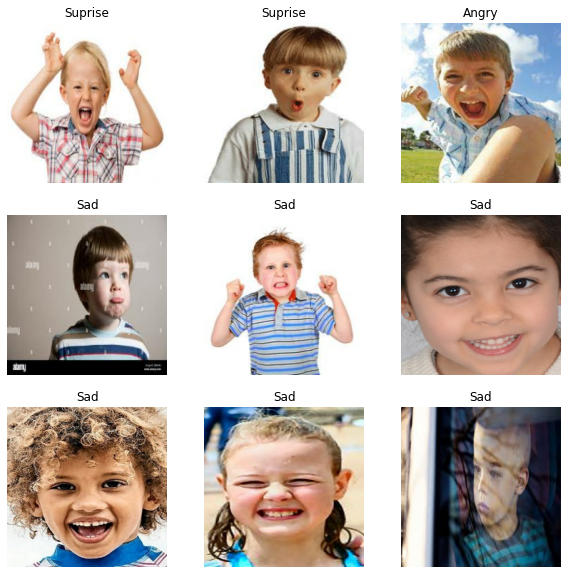

In [200]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [201]:
# Apply the ImageGenerator on the Image
batch_size=125
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [202]:
print(IMAGE_SIZE)

(224, 224)


In [203]:
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [204]:
data_augmentation = tf.keras.Sequential([
  tfl.RandomFlip('horizontal_and_vertical'),
  tfl.RandomRotation(0.2),
])

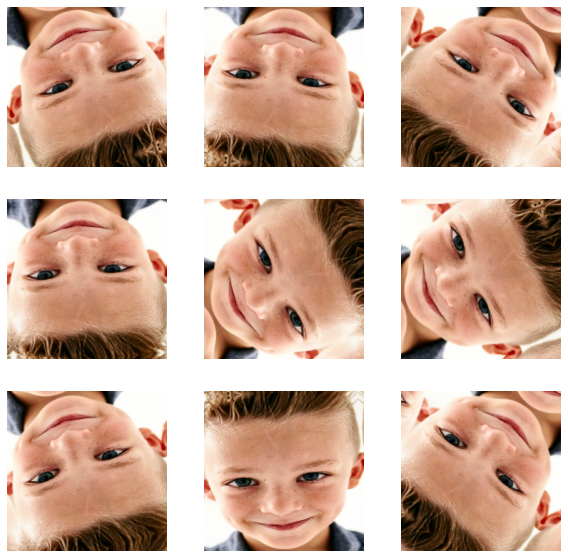

In [205]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [206]:
initial_epochs = 30

In [207]:
import tensorflow as tf
VGG16_base_model = tf.keras.applications.VGG16(input_shape = IMAGE_SHAPE, include_top = False, weights = 'imagenet')

In [208]:
VGG16_model = Sequential()
VGG16_model.add(tfl.Rescaling(1./255, input_shape = IMAGE_SHAPE))
VGG16_model.add(data_augmentation)
VGG16_model.add(VGG16_base_model)
VGG16_model.add(tfl.Flatten())
VGG16_model.add(tfl.Dense(2048, activation = 'relu'))
VGG16_model.add(tfl.Dense(7, activation = 'softmax'))

In [209]:
VGG16_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
sequential_7 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 2048)              51382272  
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 14343     
Total params: 66,111,303
Trainable params: 66,111,303
Non-trainable params: 0
__________________________________________

In [210]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-5)

In [211]:
VGG16_model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [57]:
VGG16_history = VGG16_model.fit(train_dataset,validation_data = validation_dataset, verbose = 0, epochs = initial_epochs,callbacks=[tqdm_callback])

Training:   0%|                                                                                0/30 ETA: ?s,  ?epochs/s

Epoch 1/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 2.3036 - accuracy: 0.0000
1/1███████████████████████████ ETA: 00:00s - loss: 2.3036 - accuracy: 0.0000 - val_loss: 78.8515 - val_accuracy: 0.1111
Training:   3%|██▎                                                                  1/30 ETA: 1:02:09s,  128.61s/epochs

Epoch 2/30



0/1                                                                                                          ETA: ?s - 
1/1█████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 44.0698 - accuracy: 0.4915
1/1███████████████████████████ ETA: 00:00s - loss: 44.0698 - accuracy: 0.4915 - val_loss: 2.1723 - val_accuracy: 0.1111
Training:   7%|████▋                                                                  2/30 ETA: 48:26s,  103.82s/epochs

Epoch 3/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4552 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.4552 - accuracy: 0.4915 - val_loss: 1.8736 - val_accuracy: 0.1111
Training:  10%|███████                                                                 3/30 ETA: 44:37s,  99.17s/epochs

Epoch 4/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.7258 - accuracy: 0.5254
1/1███████████████████████████ ETA: 00:00s - loss: 1.7258 - accuracy: 0.5254 - val_loss: 31.0353 - val_accuracy: 0.1111
Training:  13%|█████████▍                                                              4/30 ETA: 32:46s,  75.65s/epochs

Epoch 5/30



0/1                                                                                                          ETA: ?s - 
1/1█████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 17.6724 - accuracy: 0.4915
1/1███████████████████████████ ETA: 00:00s - loss: 17.6724 - accuracy: 0.4915 - val_loss: 1.8449 - val_accuracy: 0.1111
Training:  17%|███████████▊                                                            5/30 ETA: 26:17s,  63.08s/epochs

Epoch 6/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.6866 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.6866 - accuracy: 0.4915 - val_loss: 4.9641 - val_accuracy: 0.1111
Training:  20%|██████████████▏                                                         6/30 ETA: 22:34s,  56.45s/epochs

Epoch 7/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 2.7690 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 2.7690 - accuracy: 0.4915 - val_loss: 3.6666 - val_accuracy: 0.2222
Training:  23%|████████████████▌                                                       7/30 ETA: 20:18s,  52.99s/epochs

Epoch 8/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.7778 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.7778 - accuracy: 0.4915 - val_loss: 1.6755 - val_accuracy: 0.2222
Training:  27%|██████████████████▉                                                     8/30 ETA: 17:59s,  49.06s/epochs

Epoch 9/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.9602 - accuracy: 0.1525
1/1████████████████████████████ ETA: 00:00s - loss: 1.9602 - accuracy: 0.1525 - val_loss: 4.2271 - val_accuracy: 0.1111
Training:  30%|█████████████████████▎                                                  9/30 ETA: 16:27s,  47.01s/epochs

Epoch 10/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 2.3204 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 2.3204 - accuracy: 0.4915 - val_loss: 1.6336 - val_accuracy: 0.2222
Training:  33%|███████████████████████▎                                               10/30 ETA: 15:58s,  47.90s/epochs

Epoch 11/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.8617 - accuracy: 0.1356
1/1████████████████████████████ ETA: 00:00s - loss: 1.8617 - accuracy: 0.1356 - val_loss: 1.5775 - val_accuracy: 0.3333
Training:  37%|█████████████████████████▋                                             11/30 ETA: 14:42s,  46.47s/epochs

Epoch 12/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.8220 - accuracy: 0.1525
1/1████████████████████████████ ETA: 00:00s - loss: 1.8220 - accuracy: 0.1525 - val_loss: 1.5787 - val_accuracy: 0.2222
Training:  40%|████████████████████████████                                           12/30 ETA: 13:54s,  46.36s/epochs

Epoch 13/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.6530 - accuracy: 0.1525
1/1████████████████████████████ ETA: 00:00s - loss: 1.6530 - accuracy: 0.1525 - val_loss: 2.2596 - val_accuracy: 0.1111
Training:  43%|██████████████████████████████▎                                        13/30 ETA: 12:58s,  45.77s/epochs

Epoch 14/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4380 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.4380 - accuracy: 0.4915 - val_loss: 1.8262 - val_accuracy: 0.1111
Training:  47%|████████████████████████████████▋                                      14/30 ETA: 11:52s,  44.55s/epochs

Epoch 15/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4478 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.4478 - accuracy: 0.4915 - val_loss: 2.0416 - val_accuracy: 0.1111
Training:  50%|███████████████████████████████████                                    15/30 ETA: 10:57s,  43.80s/epochs

Epoch 16/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4149 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.4149 - accuracy: 0.4915 - val_loss: 1.8913 - val_accuracy: 0.1111
Training:  53%|█████████████████████████████████████▎                                 16/30 ETA: 10:06s,  43.34s/epochs

Epoch 17/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4087 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.4087 - accuracy: 0.4915 - val_loss: 1.8917 - val_accuracy: 0.1111
Training:  57%|███████████████████████████████████████▋                               17/30 ETA: 09:16s,  42.83s/epochs

Epoch 18/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3980 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.3980 - accuracy: 0.4915 - val_loss: 1.9081 - val_accuracy: 0.1111
Training:  60%|██████████████████████████████████████████                             18/30 ETA: 08:29s,  42.48s/epochs

Epoch 19/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3959 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.3959 - accuracy: 0.4915 - val_loss: 1.9332 - val_accuracy: 0.1111
Training:  63%|████████████████████████████████████████████▎                          19/30 ETA: 08:05s,  44.10s/epochs

Epoch 20/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3860 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.3860 - accuracy: 0.4915 - val_loss: 1.9586 - val_accuracy: 0.1111
Training:  67%|██████████████████████████████████████████████▋                        20/30 ETA: 07:22s,  44.26s/epochs

Epoch 21/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3719 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.3719 - accuracy: 0.4915 - val_loss: 1.9372 - val_accuracy: 0.1111
Training:  70%|█████████████████████████████████████████████████                      21/30 ETA: 06:57s,  46.43s/epochs

Epoch 22/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3708 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.3708 - accuracy: 0.4915 - val_loss: 1.9118 - val_accuracy: 0.1111
Training:  73%|███████████████████████████████████████████████████▎                   22/30 ETA: 06:15s,  46.96s/epochs

Epoch 23/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3662 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.3662 - accuracy: 0.4915 - val_loss: 1.9401 - val_accuracy: 0.1111
Training:  77%|█████████████████████████████████████████████████████▋                 23/30 ETA: 05:35s,  47.86s/epochs

Epoch 24/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3583 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.3583 - accuracy: 0.4915 - val_loss: 1.7505 - val_accuracy: 0.1111
Training:  80%|████████████████████████████████████████████████████████               24/30 ETA: 04:49s,  48.20s/epochs

Epoch 25/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3691 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.3691 - accuracy: 0.4915 - val_loss: 1.8188 - val_accuracy: 0.1111
Training:  83%|██████████████████████████████████████████████████████████▎            25/30 ETA: 04:07s,  49.53s/epochs

Epoch 26/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3596 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.3596 - accuracy: 0.4915 - val_loss: 1.8452 - val_accuracy: 0.1111
Training:  87%|████████████████████████████████████████████████████████████▋          26/30 ETA: 03:14s,  48.68s/epochs

Epoch 27/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3562 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.3562 - accuracy: 0.4915 - val_loss: 1.8163 - val_accuracy: 0.1111
Training:  90%|███████████████████████████████████████████████████████████████        27/30 ETA: 02:26s,  48.70s/epochs

Epoch 28/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3410 - accuracy: 0.4915
1/1████████████████████████████ ETA: 00:00s - loss: 1.3410 - accuracy: 0.4915 - val_loss: 1.5672 - val_accuracy: 0.3333
Training:  93%|█████████████████████████████████████████████████████████████████▎     28/30 ETA: 01:39s,  49.51s/epochs

Epoch 29/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4150 - accuracy: 0.4237
1/1████████████████████████████ ETA: 00:00s - loss: 1.4150 - accuracy: 0.4237 - val_loss: 2.0968 - val_accuracy: 0.1111
Training:  97%|███████████████████████████████████████████████████████████████████▋   29/30 ETA: 00:48s,  48.66s/epochs

Epoch 30/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4756 - accuracy: 0.4407
1/1████████████████████████████ ETA: 00:00s - loss: 1.4756 - accuracy: 0.4407 - val_loss: 2.1178 - val_accuracy: 0.1111
Training: 100%|██████████████████████████████████████████████████████████████████████ 30/30 ETA: 00:00s,  51.45s/epochs


In [212]:
np.mean(VGG16_history.history['accuracy'])

0.4265536626180013

In [213]:
np.mean(VGG16_history.history['val_accuracy'])

0.14074074228604636

In [214]:
VGG16_model.save('VGG16_transfer.h5')

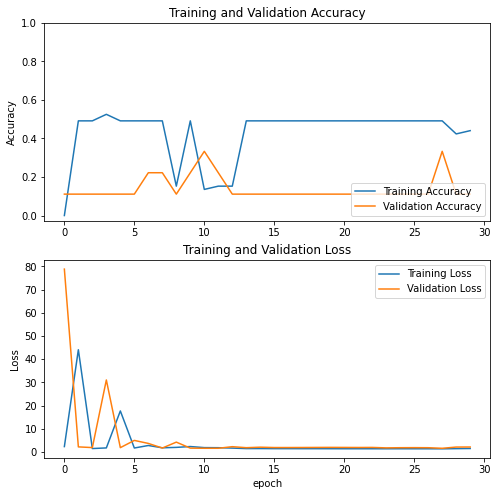

In [215]:
acc = VGG16_history.history['accuracy']
val_acc = VGG16_history.history['val_accuracy']

loss = VGG16_history.history['loss']
val_loss = VGG16_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [216]:
picture_size = 48
folder_path = r"C:\Users\Ayain John\OneDrive\Desktop\DL DATASET/"
print(len(folder_path))

48


In [217]:
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 73 images belonging to 5 classes.
Found 73 images belonging to 5 classes.


In [218]:
train_set.class_indices 

{'Angry': 0, 'Happy': 1, 'Neutral': 2, 'Sad': 3, 'Suprise': 4}

In [219]:
 from keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.keras.optimizers import Adam,SGD,RMSprop 



no_of_classes = 5
model = Sequential()

# 1 - Convolution
model.add(Conv2D(32,(3,3),input_shape = (224, 224, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
#model.add(Flatten())

# 2nd Convolution layer
model.add(Conv2D(64,(3,3),input_shape = (224, 224, 3),  padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(128,(3,3), input_shape = (224, 224, 3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(256,(3,3), input_shape = (224, 224, 3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.50))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected layer 3rd layer
#classifier.add(Dense(units = 4, activation = 'sigmoid'))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 4th layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))



model.add(Dense(5, activation='sigmoid'))



In [220]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-5)

In [221]:
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [222]:
history = model.fit(train_dataset,validation_data = validation_dataset, verbose = 0, epochs = 30,callbacks=[tqdm_callback])

Training:   0%|                                                                                0/30 ETA: ?s,  ?epochs/s

Epoch 1/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.9275 - accuracy: 0.2712
1/1███████████████████████████ ETA: 00:00s - loss: 1.9275 - accuracy: 0.2712 - val_loss: 17.4758 - val_accuracy: 0.1111
Training:   3%|██▎                                                                     1/30 ETA: 02:59s,   6.18s/epochs

Epoch 2/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.7351 - accuracy: 0.2881
1/1███████████████████████████ ETA: 00:00s - loss: 1.7351 - accuracy: 0.2881 - val_loss: 18.4041 - val_accuracy: 0.1111
Training:   7%|████▋                                                                   2/30 ETA: 01:59s,   4.26s/epochs

Epoch 3/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4892 - accuracy: 0.4237
1/1███████████████████████████ ETA: 00:00s - loss: 1.4892 - accuracy: 0.4237 - val_loss: 14.7107 - val_accuracy: 0.1111
Training:  10%|███████                                                                 3/30 ETA: 01:41s,   3.77s/epochs

Epoch 4/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.1925 - accuracy: 0.5254
1/1███████████████████████████ ETA: 00:00s - loss: 1.1925 - accuracy: 0.5254 - val_loss: 13.2964 - val_accuracy: 0.1111
Training:  13%|█████████▍                                                              4/30 ETA: 01:28s,   3.40s/epochs

Epoch 5/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.2422 - accuracy: 0.5085
1/1███████████████████████████ ETA: 00:00s - loss: 1.2422 - accuracy: 0.5085 - val_loss: 12.4443 - val_accuracy: 0.1111
Training:  17%|███████████▊                                                            5/30 ETA: 01:22s,   3.30s/epochs

Epoch 6/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.0816 - accuracy: 0.5932
1/1███████████████████████████ ETA: 00:00s - loss: 1.0816 - accuracy: 0.5932 - val_loss: 11.7373 - val_accuracy: 0.1111
Training:  20%|██████████████▏                                                         6/30 ETA: 01:15s,   3.16s/epochs

Epoch 7/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3346 - accuracy: 0.4237
1/1████████████████████████████ ETA: 00:00s - loss: 1.3346 - accuracy: 0.4237 - val_loss: 9.1630 - val_accuracy: 0.1111
Training:  23%|████████████████▌                                                       7/30 ETA: 01:10s,   3.06s/epochs

Epoch 8/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.0670 - accuracy: 0.5932
1/1████████████████████████████ ETA: 00:00s - loss: 1.0670 - accuracy: 0.5932 - val_loss: 5.5093 - val_accuracy: 0.3333
Training:  27%|██████████████████▉                                                     8/30 ETA: 01:06s,   3.01s/epochs

Epoch 9/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.0283 - accuracy: 0.5932
1/1████████████████████████████ ETA: 00:00s - loss: 1.0283 - accuracy: 0.5932 - val_loss: 5.4826 - val_accuracy: 0.2222
Training:  30%|█████████████████████▎                                                  9/30 ETA: 01:03s,   3.04s/epochs

Epoch 10/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.9691 - accuracy: 0.6102
1/1████████████████████████████ ETA: 00:00s - loss: 0.9691 - accuracy: 0.6102 - val_loss: 5.8947 - val_accuracy: 0.3333
Training:  33%|███████████████████████▎                                               10/30 ETA: 01:02s,   3.12s/epochs

Epoch 11/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.8812 - accuracy: 0.6102
1/1████████████████████████████ ETA: 00:00s - loss: 0.8812 - accuracy: 0.6102 - val_loss: 5.5301 - val_accuracy: 0.2222
Training:  37%|█████████████████████████▋                                             11/30 ETA: 01:00s,   3.18s/epochs

Epoch 12/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.7204 - accuracy: 0.7119
1/1████████████████████████████ ETA: 00:00s - loss: 0.7204 - accuracy: 0.7119 - val_loss: 4.8851 - val_accuracy: 0.2222
Training:  40%|████████████████████████████                                           12/30 ETA: 00:58s,   3.22s/epochs

Epoch 13/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.6950 - accuracy: 0.6441
1/1████████████████████████████ ETA: 00:00s - loss: 0.6950 - accuracy: 0.6441 - val_loss: 4.4445 - val_accuracy: 0.3333
Training:  43%|██████████████████████████████▎                                        13/30 ETA: 00:54s,   3.21s/epochs

Epoch 14/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.8204 - accuracy: 0.6441
1/1████████████████████████████ ETA: 00:00s - loss: 0.8204 - accuracy: 0.6441 - val_loss: 5.0352 - val_accuracy: 0.3333
Training:  47%|████████████████████████████████▋                                      14/30 ETA: 00:52s,   3.30s/epochs

Epoch 15/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.7647 - accuracy: 0.6610
1/1████████████████████████████ ETA: 00:00s - loss: 0.7647 - accuracy: 0.6610 - val_loss: 4.8451 - val_accuracy: 0.3333
Training:  50%|███████████████████████████████████                                    15/30 ETA: 00:49s,   3.29s/epochs

Epoch 16/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.8995 - accuracy: 0.6949
1/1████████████████████████████ ETA: 00:00s - loss: 0.8995 - accuracy: 0.6949 - val_loss: 4.1724 - val_accuracy: 0.3333
Training:  53%|█████████████████████████████████████▎                                 16/30 ETA: 00:45s,   3.27s/epochs

Epoch 17/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.7776 - accuracy: 0.6610
1/1████████████████████████████ ETA: 00:00s - loss: 0.7776 - accuracy: 0.6610 - val_loss: 4.5531 - val_accuracy: 0.2222
Training:  57%|███████████████████████████████████████▋                               17/30 ETA: 00:42s,   3.30s/epochs

Epoch 18/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.6500 - accuracy: 0.6949
1/1████████████████████████████ ETA: 00:00s - loss: 0.6500 - accuracy: 0.6949 - val_loss: 4.6816 - val_accuracy: 0.1111
Training:  60%|██████████████████████████████████████████                             18/30 ETA: 00:40s,   3.34s/epochs

Epoch 19/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.4717 - accuracy: 0.8136
1/1████████████████████████████ ETA: 00:00s - loss: 0.4717 - accuracy: 0.8136 - val_loss: 4.8195 - val_accuracy: 0.1111
Training:  63%|████████████████████████████████████████████▎                          19/30 ETA: 00:37s,   3.42s/epochs

Epoch 20/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.9766 - accuracy: 0.5932
1/1████████████████████████████ ETA: 00:00s - loss: 0.9766 - accuracy: 0.5932 - val_loss: 4.5556 - val_accuracy: 0.1111
Training:  67%|██████████████████████████████████████████████▋                        20/30 ETA: 00:34s,   3.46s/epochs

Epoch 21/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.7300 - accuracy: 0.7119
1/1████████████████████████████ ETA: 00:00s - loss: 0.7300 - accuracy: 0.7119 - val_loss: 4.7115 - val_accuracy: 0.0000
Training:  70%|█████████████████████████████████████████████████                      21/30 ETA: 00:33s,   3.77s/epochs

Epoch 22/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.8461 - accuracy: 0.6102
1/1████████████████████████████ ETA: 00:00s - loss: 0.8461 - accuracy: 0.6102 - val_loss: 5.0797 - val_accuracy: 0.1111
Training:  73%|███████████████████████████████████████████████████▎                   22/30 ETA: 00:29s,   3.74s/epochs

Epoch 23/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.7273 - accuracy: 0.6271
1/1████████████████████████████ ETA: 00:00s - loss: 0.7273 - accuracy: 0.6271 - val_loss: 5.2371 - val_accuracy: 0.1111
Training:  77%|█████████████████████████████████████████████████████▋                 23/30 ETA: 00:25s,   3.69s/epochs

Epoch 24/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.6817 - accuracy: 0.6441
1/1████████████████████████████ ETA: 00:00s - loss: 0.6817 - accuracy: 0.6441 - val_loss: 5.0947 - val_accuracy: 0.1111
Training:  80%|████████████████████████████████████████████████████████               24/30 ETA: 00:21s,   3.65s/epochs

Epoch 25/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.6979 - accuracy: 0.6780
1/1████████████████████████████ ETA: 00:00s - loss: 0.6979 - accuracy: 0.6780 - val_loss: 5.1131 - val_accuracy: 0.1111
Training:  83%|██████████████████████████████████████████████████████████▎            25/30 ETA: 00:18s,   3.62s/epochs

Epoch 26/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.5150 - accuracy: 0.7458
1/1████████████████████████████ ETA: 00:00s - loss: 0.5150 - accuracy: 0.7458 - val_loss: 4.9909 - val_accuracy: 0.1111
Training:  87%|████████████████████████████████████████████████████████████▋          26/30 ETA: 00:14s,   3.60s/epochs

Epoch 27/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.6101 - accuracy: 0.6780
1/1████████████████████████████ ETA: 00:00s - loss: 0.6101 - accuracy: 0.6780 - val_loss: 4.5859 - val_accuracy: 0.1111
Training:  90%|███████████████████████████████████████████████████████████████        27/30 ETA: 00:10s,   3.57s/epochs

Epoch 28/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.4873 - accuracy: 0.8475
1/1████████████████████████████ ETA: 00:00s - loss: 0.4873 - accuracy: 0.8475 - val_loss: 4.1414 - val_accuracy: 0.1111
Training:  93%|█████████████████████████████████████████████████████████████████▎     28/30 ETA: 00:07s,   3.56s/epochs

Epoch 29/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.6932 - accuracy: 0.6949
1/1████████████████████████████ ETA: 00:00s - loss: 0.6932 - accuracy: 0.6949 - val_loss: 3.6388 - val_accuracy: 0.1111
Training:  97%|███████████████████████████████████████████████████████████████████▋   29/30 ETA: 00:03s,   3.54s/epochs

Epoch 30/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 0.5552 - accuracy: 0.7119
1/1████████████████████████████ ETA: 00:00s - loss: 0.5552 - accuracy: 0.7119 - val_loss: 3.4848 - val_accuracy: 0.0000
Training: 100%|██████████████████████████████████████████████████████████████████████ 30/30 ETA: 00:00s,   3.45s/epochs


In [223]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_61 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
activation_8 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_62 (Batc (None, 112, 112, 64)     

In [224]:
np.mean(history.history['accuracy'])

0.6169491539398829

In [225]:
np.mean(history.history['val_accuracy'])

0.16296296566724777

In [1]:

# calculates precision for 1:1:100 dataset with 50tp,20fp, 99tp,51fp
from sklearn.metrics import precision_score
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos1 + act_pos2 + act_neg
# define predictions
pred_pos1 = [0 for _ in range(50)] + [1 for _ in range(50)]
pred_pos2 = [0 for _ in range(1)] + [2 for _ in range(99)]
pred_neg = [1 for _ in range(20)] + [2 for _ in range(51)] + [0 for _ in range(9929)]
y_pred = pred_pos1 + pred_pos2 + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.677


In [226]:
model.save('model.h5')

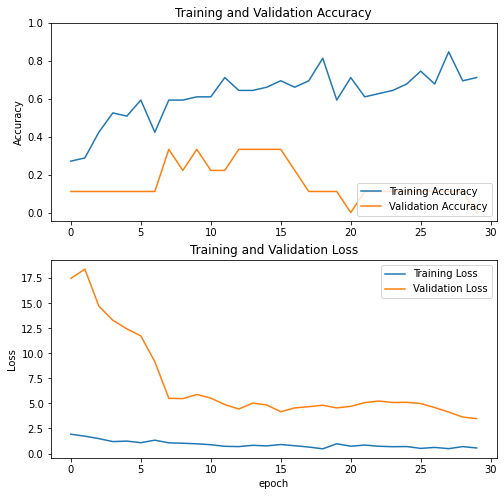

In [227]:
acc=history.history['accuracy']
val_acc =history.history['val_accuracy']

loss =history.history['loss']
val_loss =history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [228]:
# Test Set Results----------
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

for img in range(X_test.shape[0]):
    test_image = X_test[img]
#     print("Img", img, test_image.shape)
    test_image = test_image.reshape((1, ) + test_image.shape)
#     print("Img", img, test_image.shape)
    result = classifier.predict(test_image)[0]
    predicted = class_labels[result.argmax()]
    print("Actual: ", class_labels[Y_test[img].argmax()], "and Predicted: ", predicted)

Actual:  Happy and Predicted:  Sad
Actual:  Angry and Predicted:  Sad
Actual:  Happy and Predicted:  Sad
Actual:  Happy and Predicted:  Sad
Actual:  Neutral and Predicted:  Sad
Actual:  Sad and Predicted:  Sad
Actual:  Surprise and Predicted:  Sad
Actual:  Angry and Predicted:  Sad
Actual:  Surprise and Predicted:  Sad
Actual:  Sad and Predicted:  Sad
Actual:  Neutral and Predicted:  Sad
Actual:  Surprise and Predicted:  Sad
Actual:  Angry and Predicted:  Sad
Actual:  Happy and Predicted:  Sad
Actual:  Surprise and Predicted:  Sad
Actual:  Surprise and Predicted:  Sad
Actual:  Neutral and Predicted:  Sad
Actual:  Angry and Predicted:  Sad
Actual:  Angry and Predicted:  Sad
Actual:  Surprise and Predicted:  Sad
Actual:  Angry and Predicted:  Sad
Actual:  Neutral and Predicted:  Sad
Actual:  Sad and Predicted:  Sad
Actual:  Neutral and Predicted:  Sad
Actual:  Surprise and Predicted:  Sad
Actual:  Angry and Predicted:  Sad
Actual:  Surprise and Predicted:  Sad
Actual:  Happy and Predicte

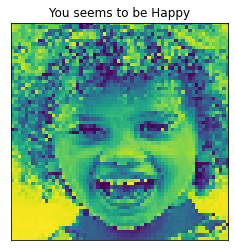

In [229]:
# Making a new Single prediction
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

org_image = image.load_img(r'C:\Users\Ayain John\OneDrive\Desktop\DL DATASET\Test\Happy\10.jpg', target_size = (64, 64), color_mode = "grayscale")
test_image = image.img_to_array(org_image)
test_image = test_image.reshape((1, ) + test_image.shape)
result = classifier.predict(test_image)[0]
predicted = class_labels[result.argmax()]
# print(predicted)

plt.xticks([])
plt.yticks([])
    
plt.title(" You seems to be {} ".format(predicted))
plt.show(plt.imshow(org_image))

In [230]:
def bottleneck_residual_block(X, filters, reduce=False, s=2):
    F1, F2, F3 = filters
    X_shortcut = X
    
    if reduce:
        X = keras.layers.Conv2D(filters=F1, kernel_size=(1,1), strides=(s,s), padding='valid', kernel_initializer=keras.initializers.glorot_uniform(seed=0))(X)
        X = keras.layers.BatchNormalization(axis=3)(X)
        X = keras.layers.ReLU()(X)
        
        X_shortcut = keras.layers.Conv2D(filters=F3, kernel_size=(1,1), strides=(s,s), padding='valid', kernel_initializer=keras.initializers.glorot_uniform(seed=0))(X_shortcut)
        X_shortcut = keras.layers.BatchNormalization(axis=3)(X_shortcut)
    else: 
        X = keras.layers.Conv2D(filters=F1, kernel_size=(1,1), strides=(1,1), padding='valid', kernel_initializer=keras.initializers.glorot_uniform(seed=0))(X)
        X = keras.layers.BatchNormalization(axis=3)(X)
        X = keras.layers.ReLU()(X)
    
    X = keras.layers.Conv2D(filters=F2, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer=keras.initializers.glorot_uniform(seed=0))(X)
    X = keras.layers.BatchNormalization(axis=3)(X)
    X = keras.layers.ReLU()(X)

    X = keras.layers.Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid', kernel_initializer=keras.initializers.glorot_uniform(seed=0))(X)
    X = keras.layers.BatchNormalization(axis=3)(X)

    X = keras.layers.Add()([X, X_shortcut])
    X = keras.layers.ReLU()(X)
    
    return X
def ResNet50(classes):
    X_input = keras.layers.Input(shape=[224, 224, 3])

    X = keras.layers.Conv2D(64, (7, 7), strides=(2, 2), kernel_initializer=keras.initializers.glorot_uniform(seed=0))(X_input)
    X = keras.layers.BatchNormalization(axis=3)(X)
    X = keras.layers.ReLU()(X)
    X = keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = bottleneck_residual_block(X, [64, 64, 256], reduce=True, s=1)
    X = bottleneck_residual_block(X, [64, 64, 256])
    X = bottleneck_residual_block(X, [64, 64, 256])

    X = bottleneck_residual_block(X, [128, 128, 512], reduce=True)
    X = bottleneck_residual_block(X, [128, 128, 512])
    X = bottleneck_residual_block(X, [128, 128, 512])
    X = bottleneck_residual_block(X, [128, 128, 512])

    X = bottleneck_residual_block(X, [256, 256, 1024], reduce=True)
    X = bottleneck_residual_block(X, [256, 256, 1024])
    X = bottleneck_residual_block(X, [256, 256, 1024])
    X = bottleneck_residual_block(X, [256, 256, 1024])
    X = bottleneck_residual_block(X, [256, 256, 1024])
    X = bottleneck_residual_block(X, [256, 256, 1024])

    X = bottleneck_residual_block(X, [512, 512, 2048], reduce=True)
    X = bottleneck_residual_block(X, [512, 512, 2048])
    X = bottleneck_residual_block(X, [512, 512, 2048])

    X = keras.layers.AveragePooling2D((1,1))(X)

    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(units=512, activation='relu')(X)
    X = keras.layers.Dense(units=classes, activation='softmax')(X)
    
    model1 = keras.models.Model(inputs=X_input, outputs=X)

    return model1

Happy


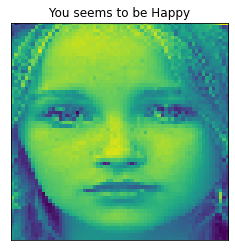

In [231]:
# Making a new Single prediction
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

org_image = image.load_img(r'C:\Users\Ayain John\OneDrive\Desktop\DL DATASET\Test\Neutral\Non_Autistic.113.jpg', target_size = (64, 64), color_mode = "grayscale")
test_image = image.img_to_array(org_image)
test_image = test_image.reshape((1, ) + test_image.shape)
result = classifier.predict(test_image)[0]
predicted = class_labels[result.argmax()]
print(predicted)

plt.xticks([])
plt.yticks([])
    
plt.title(" You seems to be {} ".format(predicted))
plt.show(plt.imshow(org_image))

In [75]:
model1 = ResNet50(5)
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 109, 109, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 109, 109, 64) 256         conv2d_4[0][0]                   
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 109, 109, 64) 0           batch_normalization_8[0][0]      
______________________________________________________________________________________________

In [76]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-5)

In [77]:
model1.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [78]:
history1 = model1.fit(train_dataset,validation_data = validation_dataset, verbose = 0, epochs = 30,callbacks=[tqdm_callback])

Training:   0%|                                                                                0/30 ETA: ?s,  ?epochs/s

Epoch 1/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 2.7797 - accuracy: 0.1864
1/1████████████████████████ ETA: 00:00s - loss: 2.7797 - accuracy: 0.1864 - val_loss: 29633.5352 - val_accuracy: 0.1111
Training:   3%|██▎                                                                     1/30 ETA: 42:24s,  87.73s/epochs

Epoch 2/30



0/1                                                                                                          ETA: ?s - 
1/1████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 405.1234 - accuracy: 0.4915
1/1█████████████████████ ETA: 00:00s - loss: 405.1234 - accuracy: 0.4915 - val_loss: 412578.4375 - val_accuracy: 0.1111
Training:   7%|████▋                                                                   2/30 ETA: 33:35s,  72.00s/epochs

Epoch 3/30



0/1                                                                                                          ETA: ?s - 
1/1████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 167.8016 - accuracy: 0.1356
1/1████████████████████ ETA: 00:00s - loss: 167.8016 - accuracy: 0.1356 - val_loss: 2144453.2500 - val_accuracy: 0.1111
Training:  10%|███████                                                                 3/30 ETA: 31:05s,  69.08s/epochs

Epoch 4/30



0/1                                                                                                          ETA: ?s - 
1/1█████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 37.0031 - accuracy: 0.1695
1/1█████████████████████ ETA: 00:00s - loss: 37.0031 - accuracy: 0.1695 - val_loss: 6584802.5000 - val_accuracy: 0.2222
Training:  13%|█████████▍                                                              4/30 ETA: 28:37s,  66.06s/epochs

Epoch 5/30



0/1                                                                                                          ETA: ?s - 
1/1█████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 10.2366 - accuracy: 0.1695
1/1████████████████████ ETA: 00:00s - loss: 10.2366 - accuracy: 0.1695 - val_loss: 11012048.0000 - val_accuracy: 0.2222
Training:  17%|███████████▊                                                            5/30 ETA: 26:49s,  64.40s/epochs

Epoch 6/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 3.7402 - accuracy: 0.4915
1/1█████████████████████ ETA: 00:00s - loss: 3.7402 - accuracy: 0.4915 - val_loss: 13311956.0000 - val_accuracy: 0.2222
Training:  20%|██████████████▏                                                         6/30 ETA: 25:47s,  64.49s/epochs

Epoch 7/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 3.0404 - accuracy: 0.4915
1/1█████████████████████ ETA: 00:00s - loss: 3.0404 - accuracy: 0.4915 - val_loss: 13544030.0000 - val_accuracy: 0.2222
Training:  23%|████████████████▌                                                       7/30 ETA: 23:43s,  61.91s/epochs

Epoch 8/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 2.4293 - accuracy: 0.4915
1/1█████████████████████ ETA: 00:00s - loss: 2.4293 - accuracy: 0.4915 - val_loss: 13395324.0000 - val_accuracy: 0.1111
Training:  27%|██████████████████▉                                                     8/30 ETA: 22:49s,  62.26s/epochs

Epoch 9/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.9647 - accuracy: 0.4915
1/1█████████████████████ ETA: 00:00s - loss: 1.9647 - accuracy: 0.4915 - val_loss: 12767529.0000 - val_accuracy: 0.1111
Training:  30%|█████████████████████▎                                                  9/30 ETA: 21:44s,  62.13s/epochs

Epoch 10/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.6587 - accuracy: 0.4915
1/1█████████████████████ ETA: 00:00s - loss: 1.6587 - accuracy: 0.4915 - val_loss: 11454642.0000 - val_accuracy: 0.1111
Training:  33%|███████████████████████▎                                               10/30 ETA: 22:23s,  67.20s/epochs

Epoch 11/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.5072 - accuracy: 0.4915
1/1██████████████████████ ETA: 00:00s - loss: 1.5072 - accuracy: 0.4915 - val_loss: 9780321.0000 - val_accuracy: 0.1111
Training:  37%|█████████████████████████▋                                             11/30 ETA: 20:40s,  65.29s/epochs

Epoch 12/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4448 - accuracy: 0.4915
1/1██████████████████████ ETA: 00:00s - loss: 1.4448 - accuracy: 0.4915 - val_loss: 8062632.0000 - val_accuracy: 0.1111
Training:  40%|████████████████████████████                                           12/30 ETA: 17:24s,  58.04s/epochs

Epoch 13/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4261 - accuracy: 0.4915
1/1██████████████████████ ETA: 00:00s - loss: 1.4261 - accuracy: 0.4915 - val_loss: 6511471.5000 - val_accuracy: 0.1111
Training:  43%|██████████████████████████████▎                                        13/30 ETA: 15:56s,  56.29s/epochs

Epoch 14/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4246 - accuracy: 0.4915
1/1██████████████████████ ETA: 00:00s - loss: 1.4246 - accuracy: 0.4915 - val_loss: 5188286.0000 - val_accuracy: 0.1111
Training:  47%|████████████████████████████████▋                                      14/30 ETA: 15:39s,  58.70s/epochs

Epoch 15/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4272 - accuracy: 0.4915
1/1██████████████████████ ETA: 00:00s - loss: 1.4272 - accuracy: 0.4915 - val_loss: 4091891.5000 - val_accuracy: 0.1111
Training:  50%|███████████████████████████████████                                    15/30 ETA: 14:41s,  58.78s/epochs

Epoch 16/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4292 - accuracy: 0.4915
1/1██████████████████████ ETA: 00:00s - loss: 1.4292 - accuracy: 0.4915 - val_loss: 3208015.0000 - val_accuracy: 0.1111
Training:  53%|█████████████████████████████████████▎                                 16/30 ETA: 13:05s,  56.11s/epochs

Epoch 17/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4271 - accuracy: 0.4915
1/1██████████████████████ ETA: 00:00s - loss: 1.4271 - accuracy: 0.4915 - val_loss: 2506082.5000 - val_accuracy: 0.1111
Training:  57%|███████████████████████████████████████▋                               17/30 ETA: 11:44s,  54.18s/epochs

Epoch 18/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4216 - accuracy: 0.4915
1/1██████████████████████ ETA: 00:00s - loss: 1.4216 - accuracy: 0.4915 - val_loss: 1957275.5000 - val_accuracy: 0.1111
Training:  60%|██████████████████████████████████████████                             18/30 ETA: 11:05s,  55.42s/epochs

Epoch 19/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4127 - accuracy: 0.4915
1/1██████████████████████ ETA: 00:00s - loss: 1.4127 - accuracy: 0.4915 - val_loss: 1532972.3750 - val_accuracy: 0.1111
Training:  63%|████████████████████████████████████████████▎                          19/30 ETA: 09:52s,  53.83s/epochs

Epoch 20/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.4011 - accuracy: 0.4915
1/1██████████████████████ ETA: 00:00s - loss: 1.4011 - accuracy: 0.4915 - val_loss: 1202644.2500 - val_accuracy: 0.1111
Training:  67%|██████████████████████████████████████████████▋                        20/30 ETA: 08:27s,  50.79s/epochs

Epoch 21/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3903 - accuracy: 0.4915
1/1███████████████████████ ETA: 00:00s - loss: 1.3903 - accuracy: 0.4915 - val_loss: 944023.1250 - val_accuracy: 0.1111
Training:  70%|█████████████████████████████████████████████████                      21/30 ETA: 07:08s,  47.56s/epochs

Epoch 22/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3810 - accuracy: 0.4915
1/1███████████████████████ ETA: 00:00s - loss: 1.3810 - accuracy: 0.4915 - val_loss: 743821.1875 - val_accuracy: 0.1111
Training:  73%|███████████████████████████████████████████████████▎                   22/30 ETA: 06:08s,  46.00s/epochs

Epoch 23/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3774 - accuracy: 0.4915
1/1███████████████████████ ETA: 00:00s - loss: 1.3774 - accuracy: 0.4915 - val_loss: 594485.5000 - val_accuracy: 0.1111
Training:  77%|█████████████████████████████████████████████████████▋                 23/30 ETA: 07:18s,  62.67s/epochs

Epoch 24/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3618 - accuracy: 0.4915
1/1███████████████████████ ETA: 00:00s - loss: 1.3618 - accuracy: 0.4915 - val_loss: 476936.6562 - val_accuracy: 0.1111
Training:  80%|████████████████████████████████████████████████████████               24/30 ETA: 06:14s,  62.43s/epochs

Epoch 25/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3596 - accuracy: 0.4915
1/1███████████████████████ ETA: 00:00s - loss: 1.3596 - accuracy: 0.4915 - val_loss: 384434.0625 - val_accuracy: 0.1111
Training:  83%|██████████████████████████████████████████████████████████▎            25/30 ETA: 04:44s,  56.89s/epochs

Epoch 26/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3550 - accuracy: 0.4915
1/1███████████████████████ ETA: 00:00s - loss: 1.3550 - accuracy: 0.4915 - val_loss: 311532.6250 - val_accuracy: 0.1111
Training:  87%|████████████████████████████████████████████████████████████▋          26/30 ETA: 03:14s,  48.51s/epochs

Epoch 27/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3467 - accuracy: 0.4915
1/1███████████████████████ ETA: 00:00s - loss: 1.3467 - accuracy: 0.4915 - val_loss: 253276.8594 - val_accuracy: 0.1111
Training:  90%|███████████████████████████████████████████████████████████████        27/30 ETA: 02:16s,  45.53s/epochs

Epoch 28/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3346 - accuracy: 0.4915
1/1███████████████████████ ETA: 00:00s - loss: 1.3346 - accuracy: 0.4915 - val_loss: 206105.6406 - val_accuracy: 0.1111
Training:  93%|█████████████████████████████████████████████████████████████████▎     28/30 ETA: 01:29s,  44.80s/epochs

Epoch 29/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3178 - accuracy: 0.4915
1/1███████████████████████ ETA: 00:00s - loss: 1.3178 - accuracy: 0.4915 - val_loss: 167950.0781 - val_accuracy: 0.1111
Training:  97%|███████████████████████████████████████████████████████████████████▋   29/30 ETA: 00:42s,  42.90s/epochs

Epoch 30/30



0/1                                                                                                          ETA: ?s - 
1/1██████████████████████████████████████████████████████████████████████ ETA: 00:00s - loss: 1.3020 - accuracy: 0.4915
1/1███████████████████████ ETA: 00:00s - loss: 1.3020 - accuracy: 0.4915 - val_loss: 137262.6406 - val_accuracy: 0.1111
Training: 100%|██████████████████████████████████████████████████████████████████████ 30/30 ETA: 00:00s,  55.62s/epochs


In [232]:
np.mean(history1.history['accuracy'])

0.44802258859078087

In [233]:
np.mean(history1.history['val_accuracy'])

0.1259259268641472

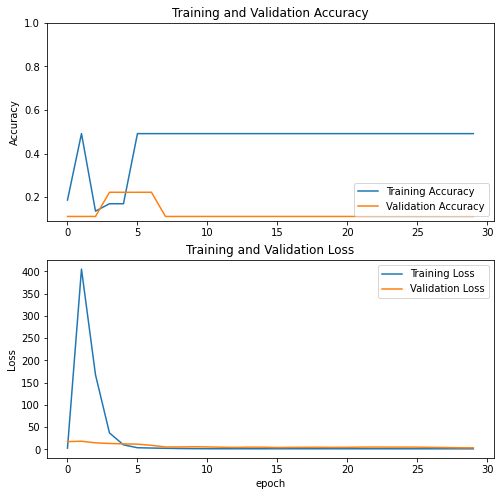

In [234]:
acc=history1.history['accuracy']
val_acc =history1.history['val_accuracy']

loss =history1.history['loss']
val_loss =history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

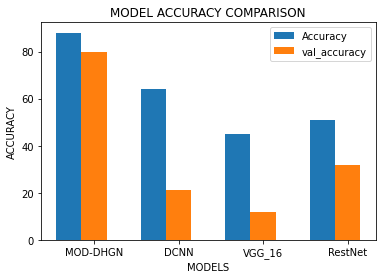

In [50]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

Accuracy = [88,64,45, 51]
val_accuracy = [80,21, 12, 32]
width =0.3
x=['MOD-DHGN','DCNN','VGG_16','RestNet']
#width=[0.1,0.3]
plt.bar(np.arange(len(Accuracy)), Accuracy, width=width,label="Accuracy")
plt.bar(np.arange(len(val_accuracy))+ width, val_accuracy,width=width,label="val_accuracy")
plt.xlabel("MODELS")
plt.ylabel("ACCURACY")
plt.title("MODEL ACCURACY COMPARISON")
plt.xticks([r + width for r in range(len(Accuracy))],
        ['MOD-DHGN','DCNN','VGG_16','RestNet'])
plt.legend()
plt.show()

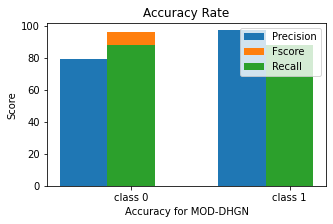

In [45]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

Precision = [79,97]
Recall= [96,80]
Fscore =[88,88]
x=['class  0','class 1']
width =0.3
fig = plt.subplots(figsize =(5, 3))
plt.bar(np.arange(len(Precision)), Precision, width=width,label="Precision")
plt.bar(np.arange(len(Fscore))+ width, Recall,width=width,label="Fscore")
plt.bar(np.arange(len(Recall))+width, Fscore,width=0.3,label="Recall")
plt.xlabel("Accuracy for MOD-DHGN")
plt.ylabel("Score")
plt.title("Accuracy Rate")
plt.xticks([r + width for r in range(len(Precision))],
        ['class 0','class 1'])
plt.legend()
plt.show()

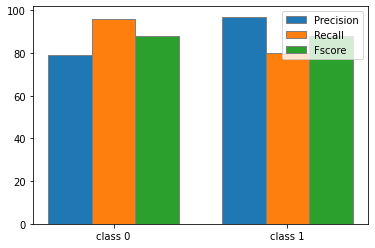

In [59]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
#fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Precision = [79,97]
Recall= [96,80]
Fscore =[88,88]
 
# Set position of bar on X axis
br1 = np.arange(len(Precision))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# Make the plot
plt.bar(br1, Precision, width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br2, Recall,  width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br3, Fscore, width = barWidth,
        edgecolor ='grey', label ='Fscore')
 
# Adding Xticks
#plt.xlabel('Accuracy for MOD-DHGN',  fontsize = 15)
#plt.ylabel('Score',  fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Precision))],
        ['class 0', 'class 1'])
 
plt.legend()
plt.show()